---

Hunter Carroll 

Programming Homework 2 

February 23, 2024

---

**<span style="color:#228b22">Problem 1</span>**

---

Suppose you are the CEO of a food truck company and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file foodtruck.txt contains the dataset for our linear regression problem. The first column is the population of a city (in 10000s) and the second column is the profit of a food truck in that city (in $10000s). A negative value for profit indicates a loss.

(a) Show a scatter plot of the data (profit vs population)

(b) Train a linear regression model with a non-iterative method. Show the minimum cost (RSS).

(c) Train a linear regression model with stochastic gradient descent (without regularization). Show the minimum cost and check the manual of the class you used to see if you can find the number of epochs before the program is finished.

(d) Make predictions for profits in areas of 35000 and 70000 people.

(e) Make a plot of the regression line along with the training data.

---

In [157]:
# First we will load in the data and rename the columns,
import pandas as pd
file_path = '/Users/huntercarroll/Desktop/DesktopHunter/Spring2024/Machine Learning/data/Homeworkprogramming1/foodtruck.txt' 
foodtruck = pd.read_csv(file_path, header=None) # Load in the data
foodtruck_columns = ['Population (in 10000s)', 'Profit (in $10000s)'] # Rename the columns
foodtruck.columns = foodtruck_columns # Set the column names
foodtruck.head() # Display the data

,Population (in 10000s),Profit (in $10000s)
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


---

**<span style="color:#228b22">(a) Show a scatter plot of the data (profit vs population)</span>**


---

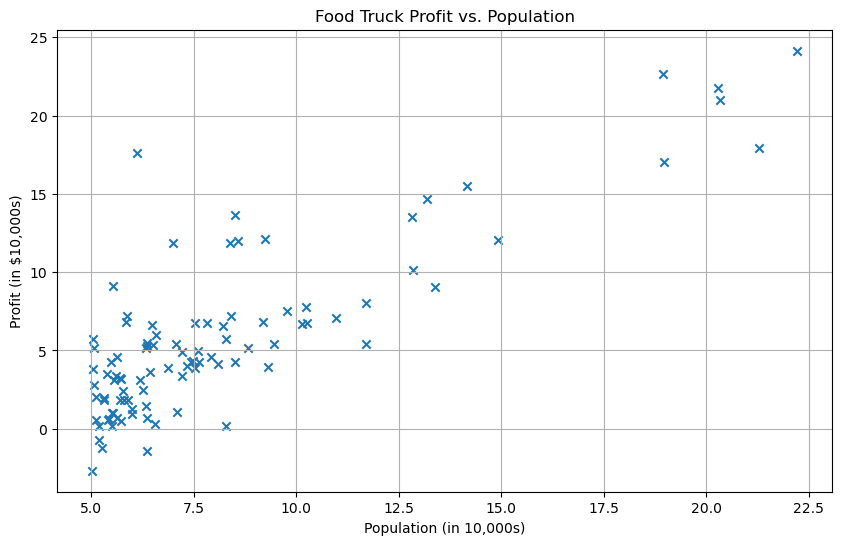

In [158]:
# Import the necessary library, 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(foodtruck['Population (in 10000s)'], foodtruck['Profit (in $10000s)'], marker = 'x')
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in $10,000s)')
plt.title('Food Truck Profit vs. Population')
plt.grid(True)

---

**<span style="color:#228b22">(b) Train a linear regression model with a non-iterative method. Show the minimum cost (RSS).</span>** The value below, $\hat{\beta}$ minimizes the RSS cost function, 

$$\hat{\beta} = (X^{T}X)^{-1}X^T\boldsymbol{y}$$

Where below we have $\beta_0 = -3.89578088$ and $\beta_1 = 1.19303364$

---

In [159]:
# First, we will create variables x and y:
import numpy as np
x_foodtruck = foodtruck['Population (in 10000s)']
y_foodtruck = foodtruck['Profit (in $10000s)']
X_foodtruck = np.c_[np.ones(len(x_foodtruck)), x_foodtruck]

# our value beta that minimizes the RSS Cost Function
beta_hat_foodtruck = np.linalg.inv(np.dot(X_foodtruck.T,X_foodtruck)).dot(X_foodtruck.T).dot(y_foodtruck)
print('beta_hat_foodtruck = ', beta_hat_foodtruck)

# Now that we have beta_hat corresponding RSS value,
y_pred_foodtruck = beta_hat_foodtruck[0] + beta_hat_foodtruck[1]*x_foodtruck
Residual_foodtruck = y_foodtruck - y_pred_foodtruck
RSS_foodtruck = np.sum(Residual_foodtruck**2)
print('RSS_foodtruck=',RSS_foodtruck )

print('='*75)

# Alternatively we can check our work using sklearn, and the results agree, 
import sklearn.linear_model
lin_reg_foodtruck = sklearn.linear_model.LinearRegression()
lin_reg_foodtruck.fit(np.c_[x_foodtruck], y_foodtruck)
print('Parameters Foodtruck = ',lin_reg_foodtruck.intercept_,lin_reg_foodtruck.coef_ )
y_pred_foodtruck_sk = lin_reg_foodtruck.predict(np.c_[x_foodtruck])
residuals_foodtruck_sk = y_foodtruck - y_pred_foodtruck_sk
RSS_foodtruck_sk = np.sum(residuals_foodtruck_sk**2)
print('RSS_foodtruck_sk=', RSS_foodtruck_sk)

beta_hat_foodtruck =  [-3.89578088  1.19303364]
RSS_foodtruck= 868.5324469391846
Parameters Foodtruck =  -3.8957808783118537 [1.19303364]
RSS_foodtruck_sk= 868.5324469391845


---

**<span style="color:#228b22">(c) Train a linear regression model with stochastic gradient descent (without regularization). Show the minimum cost and check the manual of the class you used to see if you can find the number of epochs before the program is finished.</span>**

---

In [160]:
x_foodtruck = foodtruck[['Population (in 10000s)']].values
y_foodtruck = foodtruck['Profit (in $10000s)'].values

sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, penalty = None, eta0=0.01, random_state=0)
sgd_regressor.fit(x_foodtruck, y_foodtruck)

y_pred_sgd = sgd_regressor.predict(x_foodtruck)

rss= np.sum((y_foodtruck-y_pred_sgd)**2)

epochs = sgd_regressor.n_iter_

print('Minumum Cost',rss)
print('Epochs=',epochs)

Minumum Cost 1024.7658666670054
Epochs= 8


---

**<span style="color:#228b22">(d) Make predictions for profits in areas of 35000 and 70000 people.</span>**


---

In [161]:
x_new_foodtruck = np.array([3.5, 7]).reshape(-1,1)
y_pred_foodtruck_new = sgd_regressor.predict(x_new_foodtruck)

print('y_pred_foodtruck_new=',y_pred_foodtruck_new)
print('y_pred_foodtruck_new (10000s)=',y_pred_foodtruck_new*10000)

y_pred_foodtruck_new= [1.70993232 4.73544263]
y_pred_foodtruck_new (10000s)= [17099.3232117  47354.42626634]


---

**<span style="color:#228b22">(e) Make a plot of the regression line along with the training data.</span>**


---

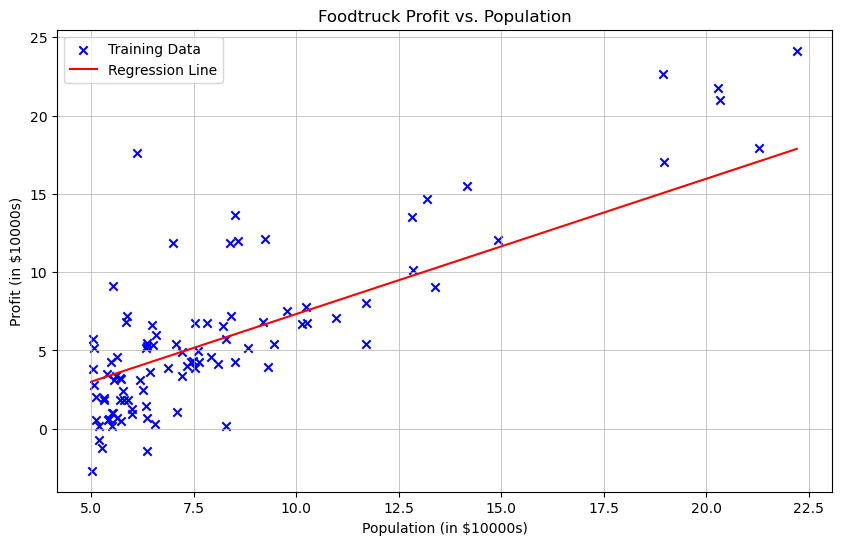

In [162]:
# Create our regression line using stochastic gradient descent 
Two_Points = np.linspace(x_foodtruck.min(),x_foodtruck.max(), 100).reshape(-1,1)
y_pred_foodtruck_twopoints= sgd_regressor.predict(Two_Points)
# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x_foodtruck,y_foodtruck, color = 'b', marker = 'x', label='Training Data')
plt.plot(Two_Points, y_pred_foodtruck_twopoints, color = 'red', label = 'Regression Line')
plt.ylabel('Profit (in $10000s)')
plt.xlabel('Population (in $10000s)')
plt.title('Foodtruck Profit vs. Population')
plt.legend()
plt.grid(True, linestyle='-', linewidth=0.5)

**<span style="color:#228b22">Problem  2</span>**

---

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file houseprice.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

(a) Train a linear regression model with SGD and print out the minimum cost (RSS).\

(b) Train a linear regression model with a non-iterative method and print out the minimum cost (RSS).\

(c) Do the minimum costs agree?\

(d) Scale you feature matrix using sklearn.preprocessing.StandardScaler. See the manual about what it is and how to use it. Train a linear regression model with SGD using the scaled features. Print out the minimum cost and what do you find?

---

In [163]:
# Load in the data and set the column names, 
file_path_house = '/Users/huntercarroll/Desktop/DesktopHunter/Spring2024/Machine Learning/data/Homeworkprogramming1/houseprice.txt'
house = pd.read_csv(file_path_house, header= None)
house_columns = ['size', 'bedrooms', 'price']
house.columns = house_columns
house.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


---

**<span style="color:#228b22">(a) Train a linear regression model with SGD and print out the minimum cost (RSS).</span>**

Note. Here I am expecting pretty bad results given we haven't scaled our features notice that the size of the house in numeric value is much larger than the magnitude of the bedrooms.

---

In [164]:
# Split our data for features and target variable, 
x_house = house[['size', 'bedrooms']] 
y_house = house['price'].values 

In [165]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sgd_reg_house = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=0)
sgd_reg_house.fit(x_house, y_house) 
print('sgd_reg_house.intercept_ = ', sgd_reg_house.intercept_, 'sgd_reg_house.coef_ = ', sgd_reg_house.coef_)
y_predicted_house_SGD_sk = sgd_reg_house.predict(x_house)
RSS_SGD_house = np.sum((y_house - y_predicted_house_SGD_sk) ** 2)
print('RSS_SGD_house', RSS_SGD_house)

sgd_reg_house.intercept_ =  [-3.15669661e+10] sgd_reg_house.coef_ =  [-1.22322496e+11 -4.03823978e+10]
RSS_SGD_house 3.2534369019345084e+30


---

**<span style="color:#228b22">b) Train a linear regression model with a non-iterative method and print out the minimum cost (RSS).</span>**

---

In [167]:
import sklearn.linear_model
lin_reg_house = sklearn.linear_model.LinearRegression()
lin_reg_house.fit(x_house, y_house) 
print('Parameters house = ',lin_reg_house.intercept_,lin_reg_house.coef_ )
y_pred_house_sk = lin_reg_house.predict(x_house)
residuals_house_sk = y_house - y_pred_house_sk
Linear_house_sk = np.sum(residuals_house_sk**2)
Linear_house_sk = np.sum((y_house-y_pred_house_sk)**2)
print('Linear_house_sk=', Linear_house_sk)

Parameters house =  89597.90954279734 [  139.21067402 -8738.01911233]
Linear_house_sk= 192068324756.6659


---

**<span style="color:#228b22">(c) Do the minimum costs agree?</span>**

---

Given, using Stochastic Gradient Descent for housing prices, we get an RSS of 3.2534369019345084e+30. Using a non-iterative method (normal equation method) per `sklearn.linear_model.LinearRegression()` as shown above we get an RSS of 192068324756.6659. In short, these minimum costs do not agree that is, they do not converge to the same solution and my initial thought on this is because in using a Stochastic Gradient Descent it is apparent that the magnitude of the size of houses in square feet and the magnitude of bedrooms are vastly different affecting the efficeincy of its convergence. This leads us into the next portion, we will scale the features using `sklearn.preprocessing.StandardScaler` and train our Stochastic Gradient Descent model once more using these scaled features and compare the RSS, or the minimum cost with the non-iterative method. 


Stochastic Gradient Descent is sensitive to the scale of the input features. Here we have large difference in the magnitude between the size of houses in square feet and the number of bedrooms which can impact the efficiency/convergence of the SGD. This is because SGD will update the model parameters for each training example one at a time. Thus, large scale differences will lead to inefficient path towards the minimum of the cost function.

**<span style="color:#228b22">SGD is sensitive to feature scaling</span>**

In [168]:
diff = abs((Linear_house_sk - RSS_SGD_house)/((Linear_house_sk + RSS_SGD_house)/2)) * 100
print('Difference Between SGD RSS and Linear RSS=',diff)

Difference Between SGD RSS and Linear RSS= 200.0


---

**<span style="color:#228b22">(d) Scale you feature matrix using sklearn.preprocessing.StandardScaler. See the manual about what it is and how to use it. Train a linear regression model with SGD using the scaled features. Print out the minimum cost and what do you find?</span>**

---

In [169]:
from sklearn.preprocessing import StandardScaler
# Split our data for features and target variable
x_house = house[['size', 'bedrooms']]
y_house = house['price'].values
# Scale the features: Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
x_house_scaled = scaler.fit_transform(x_house)

In [170]:
# Train Stochastic Gradient Descent with our scaled features
sgd_reg_house = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=0)
sgd_reg_house.fit(x_house_scaled, y_house) 
print('sgd_reg_house.intercept_ = ', sgd_reg_house.intercept_, 'sgd_reg_house.coef_ = ', sgd_reg_house.coef_)
y_predicted_house_SGD_sk = sgd_reg_house.predict(x_house_scaled)
RSS_SGD_house = np.sum((y_house - y_predicted_house_SGD_sk) ** 2)
print('RSS_SGD_house', RSS_SGD_house)

sgd_reg_house.intercept_ =  [340366.13023395] sgd_reg_house.coef_ =  [108611.50220323  -5838.86859263]
RSS_SGD_house 192094447078.3785


---

Using Stochastic Gradient Descent with scaled features improved the performance of the SGD and had similar results to that of `sklearn.linear_model.LinearRegression()` which employs the normal equation. It is important to note the reason for the drastic change between our scaled and unscaled features when using Stochastic Gradient Descent is that the SGD is sensitive to feature scaling. Without scaling the features we had the size of the house in square feet which in terms of magnitude was much greater than the magnitude of the bedroom thus, feature scaling became a viable option for improving the RSS. 

---

**<span style="color:#228b22">Problem  3</font>**

---

We want to implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model. The data are stored in QA.txt. The first two columns are the results for the two tests. The third column is the acceptance (1) or rejection (0) of the microchips.

(a) Visualize the data; different classes should have different colors and markers.

(b) Use polynomial features of degree 6 for the logistic regression. Use L2 regulariztion where $\alpha=1$. Use the following function plot_decision_boundary to plot the decision boundary.

(c) Repeat (b) using $\alpha=0$ and $\alpha=100$

(d) What do you find for the three cases?

---

In [171]:
import pandas as pd
file_path_chip = '/Users/huntercarroll/Desktop/DesktopHunter/Spring2024/Machine Learning/data/Homeworkprogramming1/QA.txt'
microchip = pd.read_csv(file_path_chip)
microchip_columns = ['Test 1', 'Test 2', 'Acceptance']
microchip.columns = microchip_columns
microchip.head()

,Test 1,Test 2,Acceptance
0,-0.092742,0.68494,1
1,-0.213710,0.69225,1
2,-0.375000,0.50219,1
3,-0.513250,0.46564,1
4,-0.524770,0.20980,1


<span style="color:#228b22">(a) Visualize the data; different classes should have different colors and markers.</font>

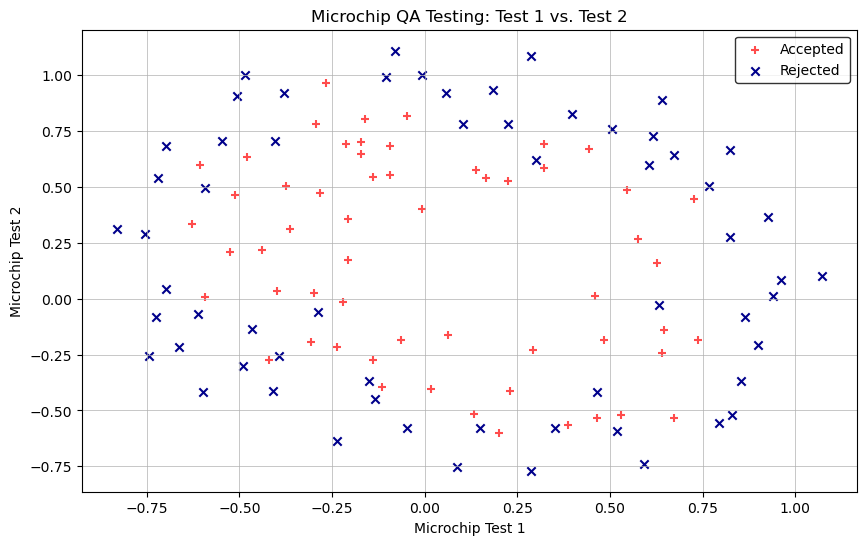

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(microchip['Test 1'][microchip['Acceptance']==1], microchip['Test 2'][microchip['Acceptance']==1], marker = '+',  color = 'red', label = 'Accepted',alpha=0.7)
plt.scatter(microchip['Test 1'][microchip['Acceptance']==0], microchip['Test 2'][microchip['Acceptance']==0], marker = 'x', color = 'darkblue', label = 'Rejected')
plt.title('Microchip QA Testing: Test 1 vs. Test 2')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='best',edgecolor='black')
plt.grid(True, linestyle='-', linewidth=0.5)

---

<span style="color:#228b22">(b) Use polynomial features of degree 6 for the logistic regression. Use L2 regulariztion where $\alpha=1$. Use the following function plot_decision_boundary to plot the decision boundary.</span>

---

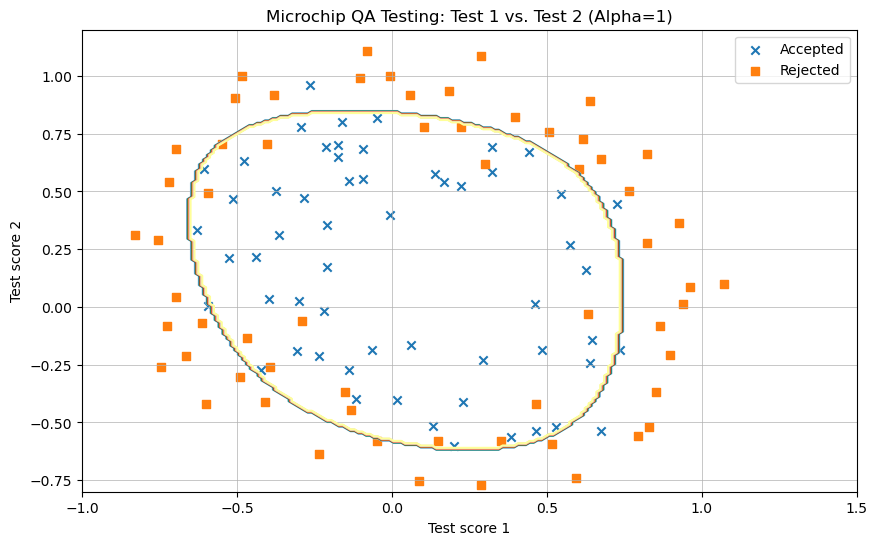

In [173]:
# Alpha = 1:

# The library used, 
from sklearn.preprocessing import PolynomialFeatures

# Build a polynomial feature object with degree 6
poly = PolynomialFeatures(degree = 6, include_bias = False)
# Our feature array, 
X = microchip[['Test 1', 'Test 2']].values
# Our target 
y = microchip['Acceptance'].values
# Add quadratic features
X = poly.fit_transform(X)

# Library used for logistic regression,
from sklearn.linear_model import LogisticRegression

# Apply logistic regression with l2 regularization and alpha = 1
log_reg = LogisticRegression(penalty='l2', C=1/1) # Model; C = 1/alpha
log_reg = log_reg.fit(X,y) # Fit the model to our feature array and target
accepted = microchip[microchip['Acceptance']==1][['Test 1', 'Test 2']] # input to plot_decision_boundary
rejected = microchip[microchip['Acceptance']==0][['Test 1', 'Test 2']] # input to plot_decision_boundary

# The plotting function
def plot_decision_boundary(model, accepted, rejected, fig_size=(10, 6)):
    """
    Plot the decision boundary along with the data for problem 3
    input:
    model: the logistic regression model
    accepted: dataframe of two columns that contains the two test scores for accepted microchips
    rejected: dataframe of two columns that contains the two test scores for rejected microchips
    """
    x_min, x_max = -1, 1.5
    y_min, y_max = -0.8, 1.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = log_reg.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=fig_size)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    

    plt.scatter(accepted.iloc[:, 0], accepted.iloc[:, 1], marker='x')
    plt.scatter(rejected.iloc[:, 0], rejected.iloc[:, 1], marker='s')
    plt.title('Microchip QA Testing: Test 1 vs. Test 2 (Alpha=1)')
    plt.legend(['Accepted', 'Rejected'])
    plt.grid(True, linestyle='-', linewidth=0.5)
    plt.xlabel('Test score 1')
    plt.ylabel('Test score 2');

# Plot the decision boundary 
plot_decision_boundary(log_reg,accepted, rejected )

---

<span style="color:#228b22">(c) Repeat (b) using $\alpha=0$ and $\alpha=100$</span>

---

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


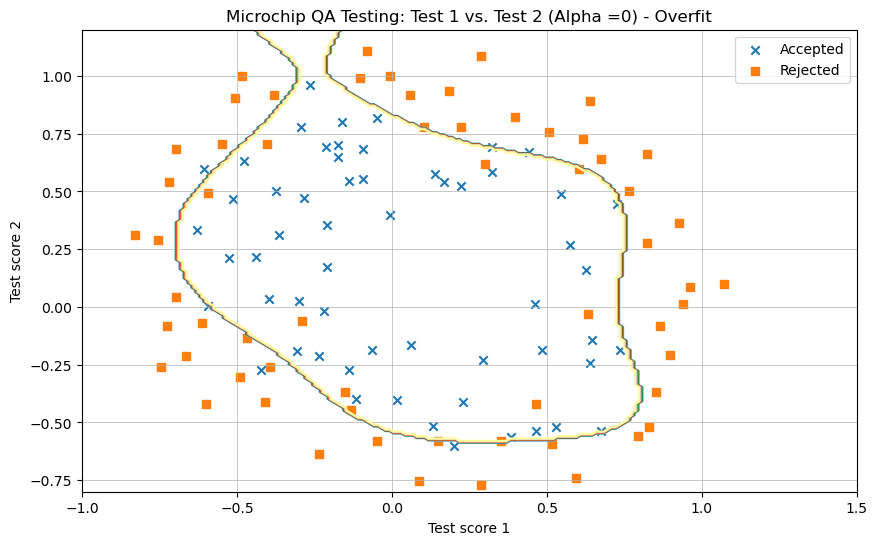

In [174]:
# Alpha = 0:

# The library used, 
from sklearn.preprocessing import PolynomialFeatures

# Build a polynomial feature object with degree 6
poly = PolynomialFeatures(degree = 6, include_bias = False)
# Our feature array, 
X = microchip[['Test 1', 'Test 2']].values
# Our target 
y = microchip['Acceptance'].values
# Add quadratic features
X = poly.fit_transform(X)

# Library used for logistic regression,
from sklearn.linear_model import LogisticRegression

# Apply logistic regression no regularization
log_reg = LogisticRegression(penalty='none') # Model; C = 1/alpha. However, here we will apply no penalty. 
log_reg = log_reg.fit(X,y) # Fit the model to our feature array and target
accepted = microchip[microchip['Acceptance']==1][['Test 1', 'Test 2']] # input to plot_decision_boundary
rejected = microchip[microchip['Acceptance']==0][['Test 1', 'Test 2']] # input to plot_decision_boundary

# The plotting function
def plot_decision_boundary(model, accepted, rejected,fig_size=(10, 6)):
    """
    Plot the decision boundary along with the data for problem 3
    input:
    model: the logistic regression model
    accepted: dataframe of two columns that contains the two test scores for accepted microchips
    rejected: dataframe of two columns that contains the two test scores for rejected microchips
    """
    x_min, x_max = -1, 1.5
    y_min, y_max = -0.8, 1.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = log_reg.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=fig_size)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(accepted.iloc[:, 0], accepted.iloc[:, 1], marker='x')
    plt.scatter(rejected.iloc[:, 0], rejected.iloc[:, 1], marker='s')
    plt.title('Microchip QA Testing: Test 1 vs. Test 2 (Alpha =0) - Overfit')
    plt.legend(['Accepted', 'Rejected'])
    plt.grid(True, linestyle='-', linewidth=0.5)
    plt.xlabel('Test score 1')
    plt.ylabel('Test score 2');

# Plot the decision boundary 
plot_decision_boundary(log_reg,accepted, rejected)

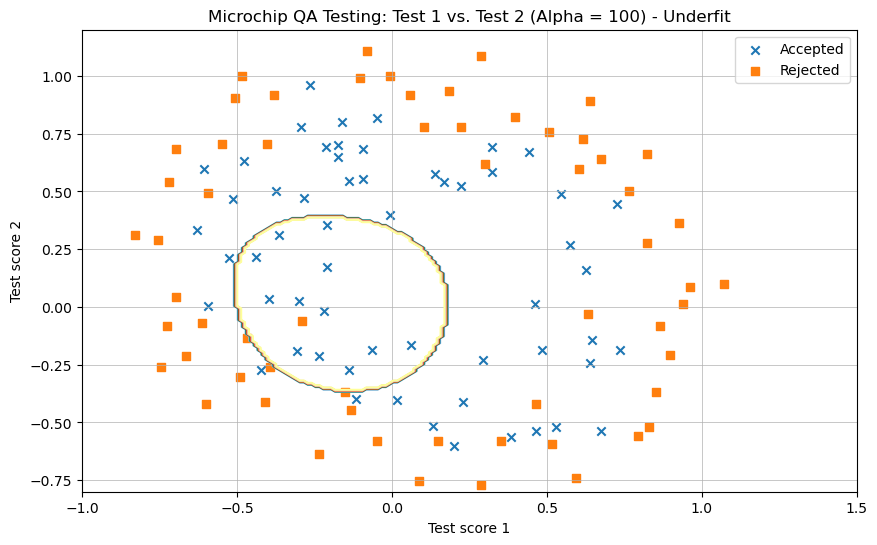

In [175]:
# Alpha = 100:

# The library used, 
from sklearn.preprocessing import PolynomialFeatures

# Build a polynomial feature object with degree 6
poly = PolynomialFeatures(degree = 6, include_bias = False)
# Our feature array, 
X = microchip[['Test 1', 'Test 2']].values
# Our target 
y = microchip['Acceptance'].values
# Add quadratic features
X = poly.fit_transform(X)

# Library used for logistic regression,
from sklearn.linear_model import LogisticRegression

# Given C = 1/alpha and we want something with zero regularization we can set C to be extremely large


# Apply logistic regression with l2 regularization and alpha = 100
log_reg = LogisticRegression(penalty='l2', C=0.01) # Model; C = 1/alpha  --> 1/100 =0.01
log_reg = log_reg.fit(X,y) # Fit the model to our feature array and target
accepted = microchip[microchip['Acceptance']==1][['Test 1', 'Test 2']] # input to plot_decision_boundary
rejected = microchip[microchip['Acceptance']==0][['Test 1', 'Test 2']] # input to plot_decision_boundary

# The plotting function
def plot_decision_boundary(model, accepted, rejected):
    """
    Plot the decision boundary along with the data for problem 3
    input:
    model: the logistic regression model
    accepted: dataframe of two columns that contains the two test scores for accepted microchips
    rejected: dataframe of two columns that contains the two test scores for rejected microchips
    """
    plt.figure(figsize=(10, 6))

    x_min, x_max = -1, 1.5
    y_min, y_max = -0.8, 1.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = log_reg.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

    
    plt.scatter(accepted.iloc[:, 0], accepted.iloc[:, 1], marker='x')
    plt.scatter(rejected.iloc[:, 0], rejected.iloc[:, 1], marker='s')
    plt.title('Microchip QA Testing: Test 1 vs. Test 2 (Alpha = 100) - Underfit')
    plt.legend(['Accepted', 'Rejected'])
    plt.grid(True, linestyle='-', linewidth=0.5)
    plt.xlabel('Test score 1')
    plt.ylabel('Test score 2');

# Plot the decision boundary 
plot_decision_boundary(log_reg,accepted, rejected )

---

<span style="color:#228b22">(d) What do you find for the three cases?</span>

---

1. $\alpha = 1$, using `L2` regularization with $\alpha=1$ provides a suitable balance between overfitting and underfitting such that it is a simple enough model but not too complex and would generalize best compared to the other alphas. This one sustains just the right amount of penalty on the model coefficients.

2. $\alpha = 0$, using `L2` regularization with $\alpha=0$ leads to overfitting and unncessary increase in model complexity unlikely to generalize well to other data. This one has no penalty on model coefficients and thus captures noise. 

3. $\alpha = 100$, using `L2` regularization with $\alpha=100$ leads to underfitting making the model to simple and unlikely to generalize well. This model has too much penalty on the model coefficients.

 ---